In [2]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
import multi_loc.covariance as covariance

In [4]:
%matplotlib inline

In [5]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [6]:
dimension = 20
rho0 = 20
x = np.arange(dimension)
x, y = np.meshgrid(x, x)
x = np.minimum(x, (dimension - x) % dimension)
y = np.minimum(y, (dimension - y) % dimension)
rho = np.sqrt(x**2 + y**2)

Text(0.5,1,'Rho for periodic boundary')

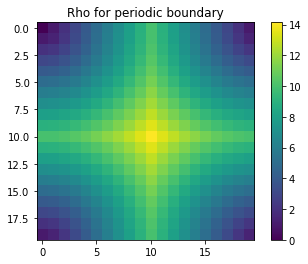

In [7]:
plt.figure()
im = plt.imshow(rho)
plt.colorbar(im)
plt.title('Rho for periodic boundary')

Text(0.5,1,'Flattened rho')

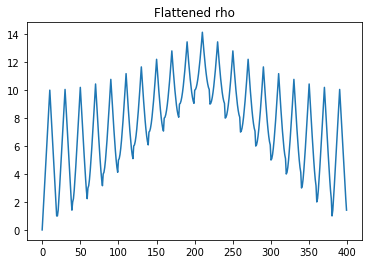

In [8]:
plt.figure()
plt.plot(rho.ravel())
plt.title('Flattened rho')

In [9]:
rho = rho.ravel()
eig_val, eig_vec, P = covariance.generate_circulant(
    rho, rho0, covariance.correlation_exp,
    return_Corr = True)
P = P.real

Text(0.5,1,'Eigenvalues (imaginary)')

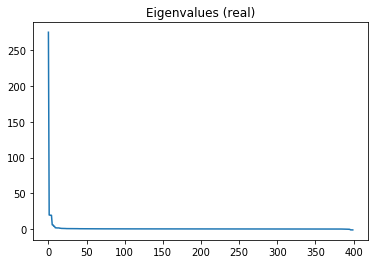

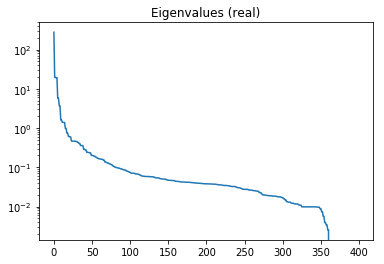

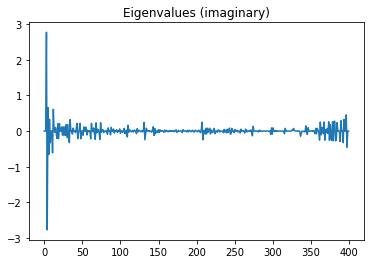

In [10]:
plt.figure()
plt.plot(eig_val.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val.imag)
plt.title('Eigenvalues (imaginary)')

Log10(condition):  4.445261121834064


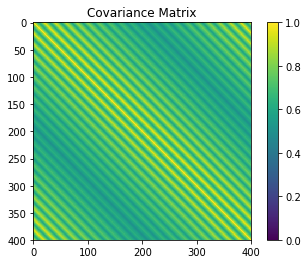

In [13]:
plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

Text(0.5,1,'Error in Reconstructed P')

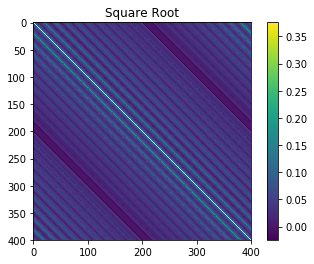

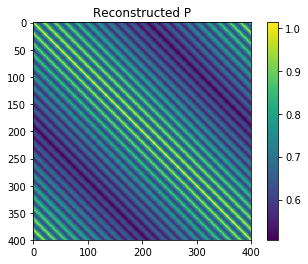

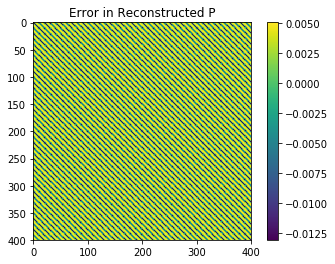

In [14]:
P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

plt.figure()
im = plt.imshow(P_sqrt)
plt.colorbar(im)
plt.title('Square Root')

plt.figure()
im = plt.imshow(P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Reconstructed P')

plt.figure()
im = plt.imshow(P - P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed P')

Text(0.5,1,'Error in Reconstructed inverse')

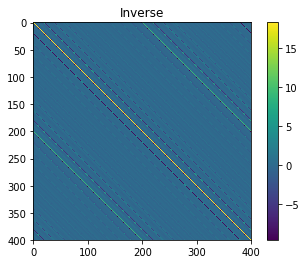

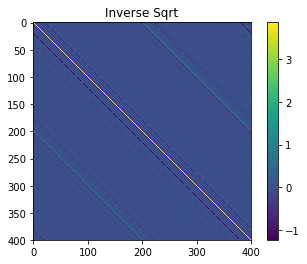

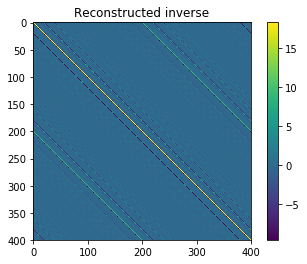

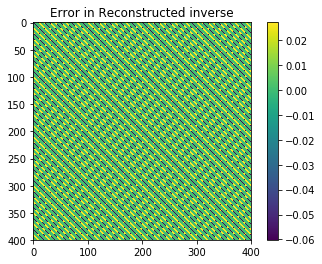

In [15]:
P_inv = covariance.matrix_inv(eig_val=eig_val,
                              eig_vec=eig_vec)
P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real

plt.figure()
im = plt.imshow(P_inv)
plt.colorbar(im)
plt.title('Inverse')

plt.figure()
im = plt.imshow(P_inv_sqrt)
plt.colorbar(im)
plt.title('Inverse Sqrt')

plt.figure()
im = plt.imshow(P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Reconstructed inverse')

plt.figure()
im = plt.imshow(P_inv - P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed inverse')

In [16]:
ens_size = int(1e3)
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu, P_sqrt)

In [17]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

Text(0.5,1,'Sample mean')

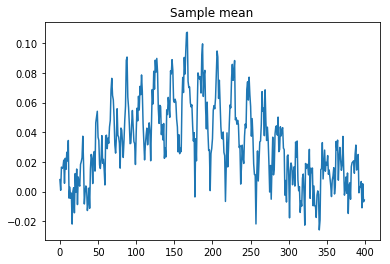

In [18]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

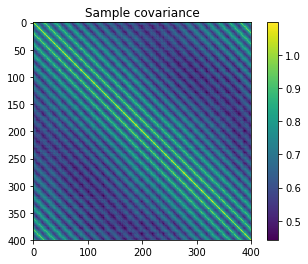

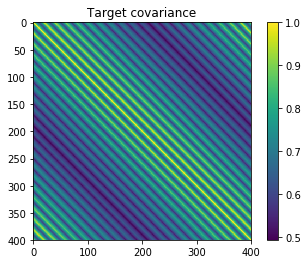

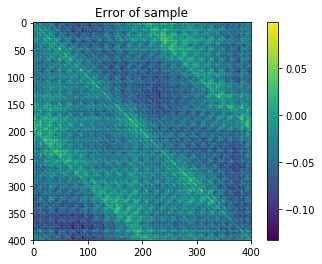

In [19]:
plt.figure()
im = plt.imshow(P_sample)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample - P)
plt.colorbar(im)
plt.title('Error of sample')

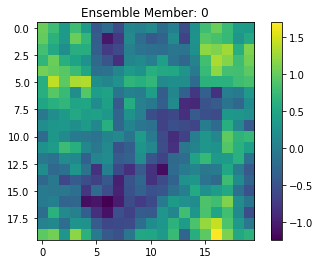

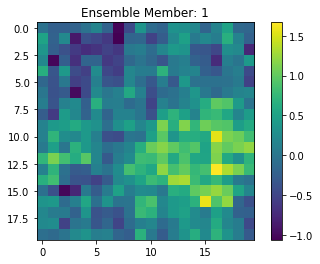

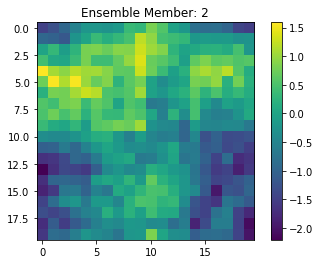

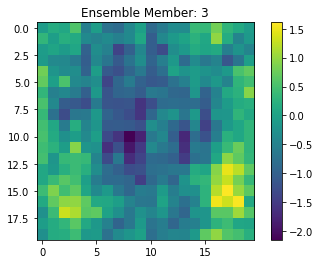

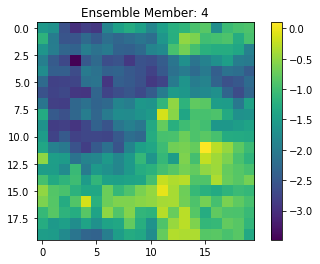

In [20]:
for ii in range(5):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')

In [42]:
ens_size = int(1e6)
num_of_eig = 100
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu,
    eig_val=eig_val[:num_of_eig],
    eig_vec=eig_vec[:, :num_of_eig])

In [43]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Sample mean')

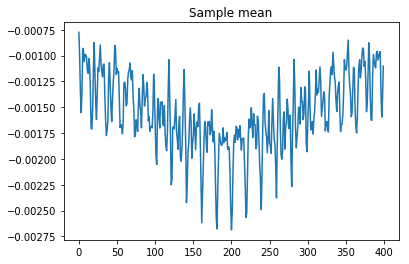

In [44]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

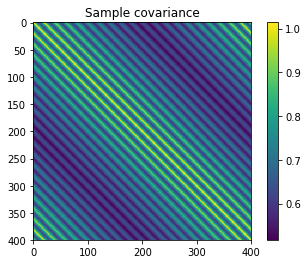

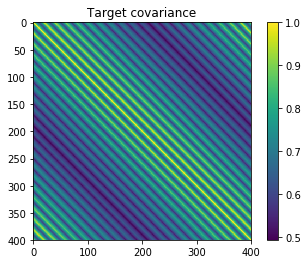

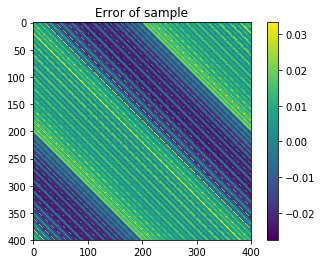

In [45]:
plt.figure()
im = plt.imshow(P_sample.real)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample.real - P)
plt.colorbar(im)
plt.title('Error of sample')

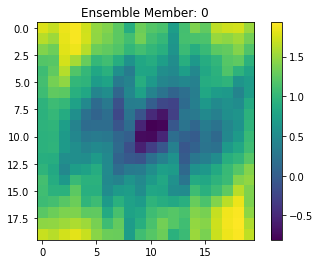

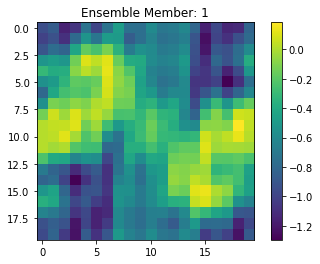

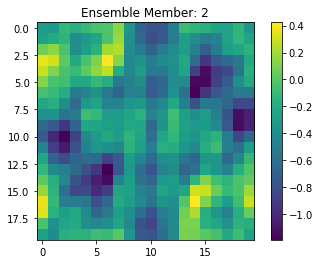

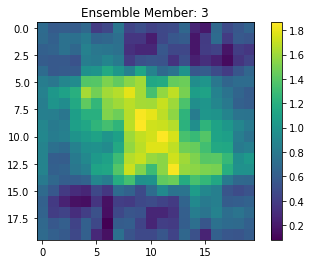

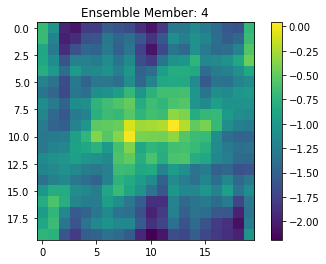

In [46]:
for ii in range(5):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].real
        .reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')

In [47]:
dimension = 100
rho0 = 20
x = np.arange(dimension)
x, y = np.meshgrid(x, x)
x = np.minimum(x, (dimension - x) % dimension)
y = np.minimum(y, (dimension - y) % dimension)
rho = np.sqrt(x**2 + y**2)

Text(0.5,1,'Rho for periodic boundary')

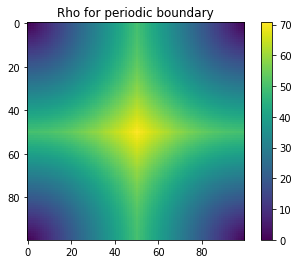

In [48]:
plt.figure()
im = plt.imshow(rho)
plt.colorbar(im)
plt.title('Rho for periodic boundary')

Text(0.5,1,'Flattened rho')

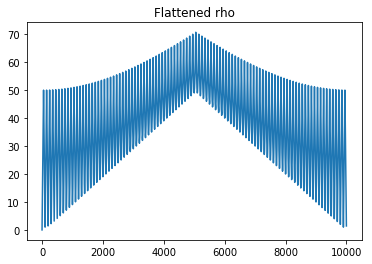

In [49]:
plt.figure()
plt.plot(rho.ravel())
plt.title('Flattened rho')

In [50]:
rho = rho.ravel()
eig_val, eig_vec = covariance.generate_circulant(
    rho, rho0, covariance.correlation_exp)

In [51]:
ens_size = int(1e3)
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu,
    eig_val=eig_val,
    eig_vec=eig_vec)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Sample mean')

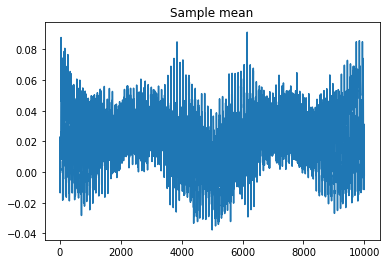

In [52]:
mu_sample = X_ens.mean(axis=1)
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

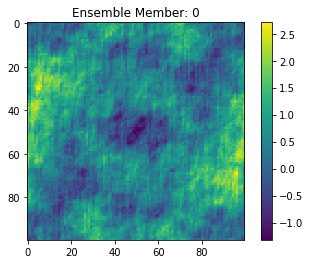

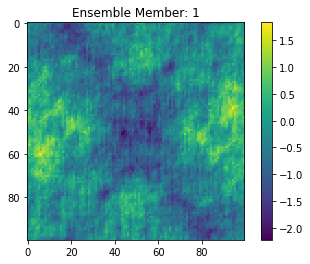

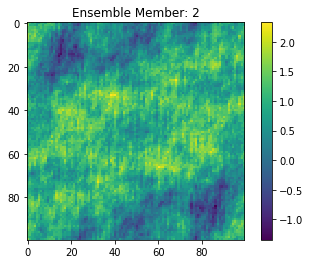

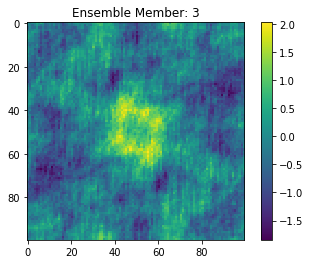

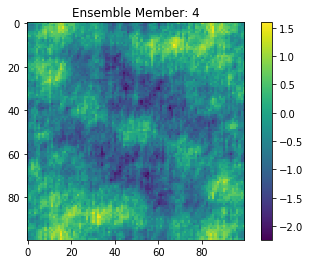

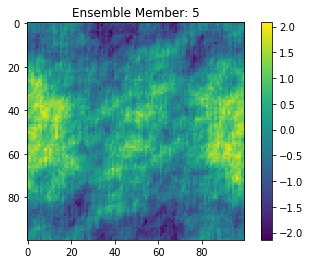

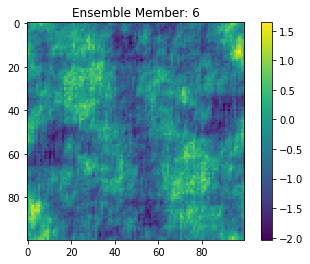

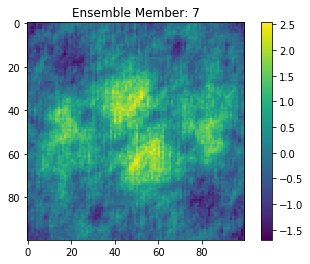

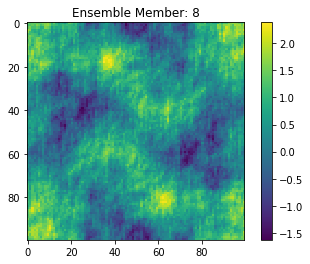

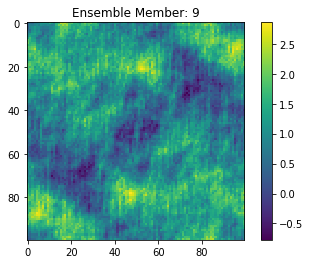

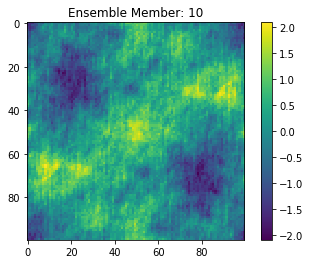

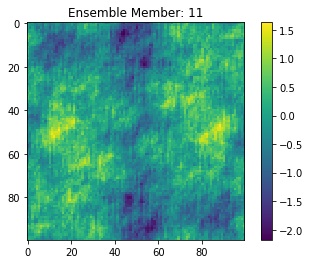

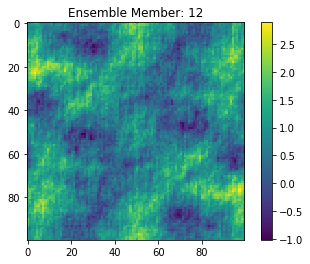

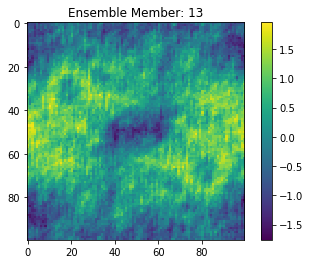

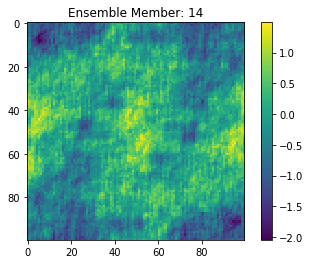

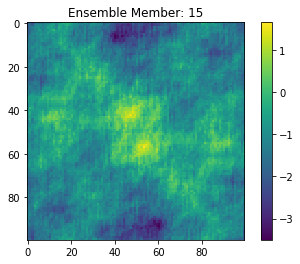

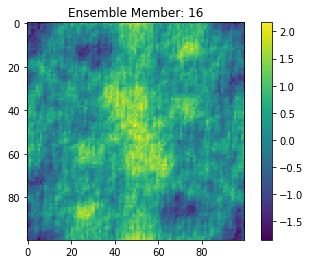

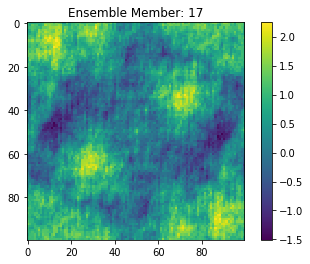

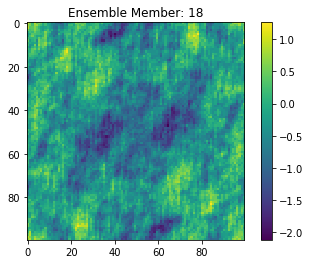

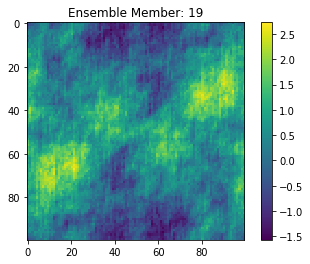

In [55]:
for ii in range(20):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].real
        .reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')